<a href="https://colab.research.google.com/github/maitecampos/examen/blob/main/CcsDatosEconm%C3%ADa_Examenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

#maite campos

In [ ]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

In [ ]:

import numpy as np # manejo numérico
import matplotlib.pyplot as plt # graficos
import seaborn as sns # graficos
from sklearn.model_selection import train_test_split # Separar el set de datos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Importar métricas de rendimientos

In [ ]:
df = adult.data.original
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


3## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

In [ ]:
#DETECCIÓN DATOS FALTANTES
print(df.isnull().sum())




age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [ ]:
#LIMPIEZA DE DATOS
#eliminamos los NAN en las columnas
df.dropna(inplace=True)

#verificamos que las variables correspndan a cada tipo
df.info()

#para mayor facilidad, hacemos una función en la variable income, haré que si es menor o igual a 50 (<=50K / <=50K. ) = 0. Si es mayor  (>50K) = 1
df["income"] = df["income"].apply(lambda x: 0 if x == "<=50K" or "<=50K." else 1)

#eliminaré la columna fnlwgt ya que tampoco en la base de datos especifica para qué sirve y tengo suficientes datos para obtener análisis sustanciales.
df = df.drop(['fnlwgt'], axis=1)


# ---- info:
#df["education"].shape[0]
#df.head()

#si Bachelors	13
#si HS-grad	9
#si 11th	7


<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [ ]:
df

#workclass	education marital-status	occupation	relationship race	sex	capital-gain	capital-loss	hours-per-week	native-country	income

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [ ]:
#ANÁLISIS UNIVARIAFOS

In [ ]:
#histograma
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#crearé df para una comparacion posterior.
m = df[df['sex'].isin(['Female'])]
h= df[df['sex'].isin(['Male'])]



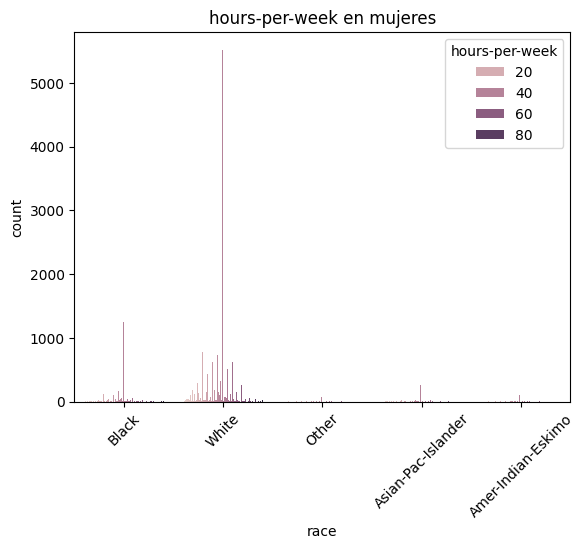

In [ ]:
#HISTOGRAMA
#creamos histograma de mujeres. con esto veremos cuantas razas de mujeres hay
sns.countplot(hue= 'hours-per-week', x="race", data=m)
plt.title('hours-per-week en mujeres')
plt.xticks(rotation=45)
plt.show()




podemos ver que las mujeres blancas lideraron la encuesta y después las mujeres negras, por lo que me enfocaré en ellas.
ahora, haré un histograma del income entre esad dos razas, la hipótesis es que las mujeres negras ganas menos, esto es debido a problemas históricos, desde la esclavitud, racismo y posteriormente la falta de oportunidades.

analizaré cuántas de ellas tienen un salario mayor a (>50K) = 1

In [ ]:

condicion = m["income"] == 1
m1= m[condicion]
m1



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


<Axes: title={'center': 'Cantidad datos completos'}>

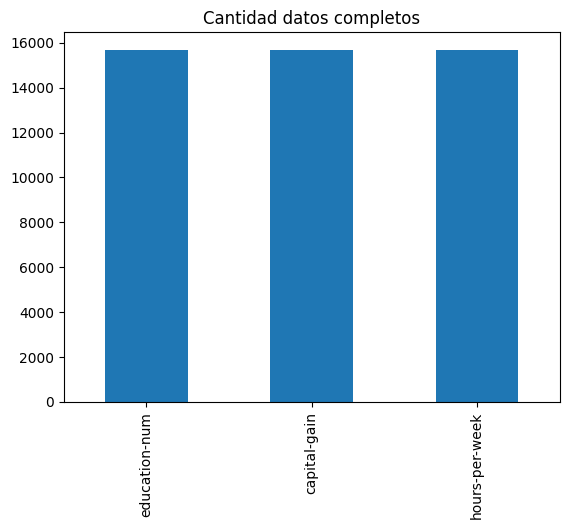

In [ ]:
#creamos un histograma por workclass (tipo de trabajo) en mujeres

m2 = m.drop([ 'age', 'workclass',	'education', 'marital-status'	,'occupation',	'relationship', 'race',	'sex'	,	'capital-loss'	,'native-country'	,'income'], axis=1)
m2.describe().T #NOS ENTREGA ESTADISTICAS DESCRIPTIVAS DE LAS VARIABLE NUMÉRICAS

m2.notna().sum().plot(kind='bar', title = 'Cantidad datos completos')

In [ ]:
m2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15684.0,36.961043,14.018418,17.0,25.0,35.0,46.0,90.0
education-num,15684.0,10.062229,2.379953,1.0,9.0,10.0,12.0,16.0


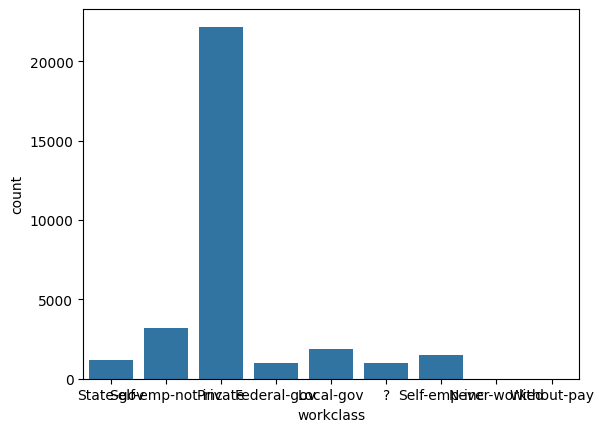

In [ ]:
#creamos un histograma por workclass (tipo de trabajo) en hombres

sns.countplot(x="workclass", data=h)
plt.show()

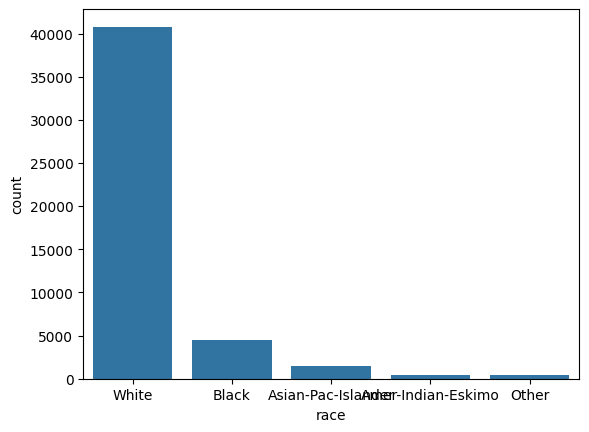

In [ ]:
#creamos de histograma por race (tipo de raza)

sns.countplot(x="race", data=df)
plt.show()

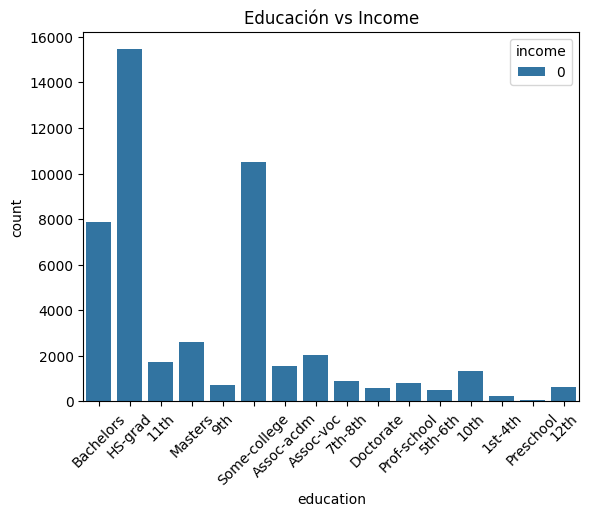

In [ ]:

#Comparación de education con income
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title('Educación vs Income')
plt.show()

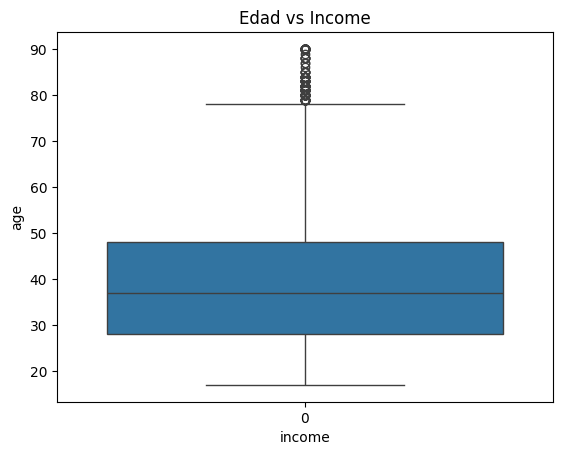

In [ ]:
#Boxplot de edad vs income
sns.boxplot(x='income', y='age', data=df)
plt.title('Edad vs Income')
plt.show()


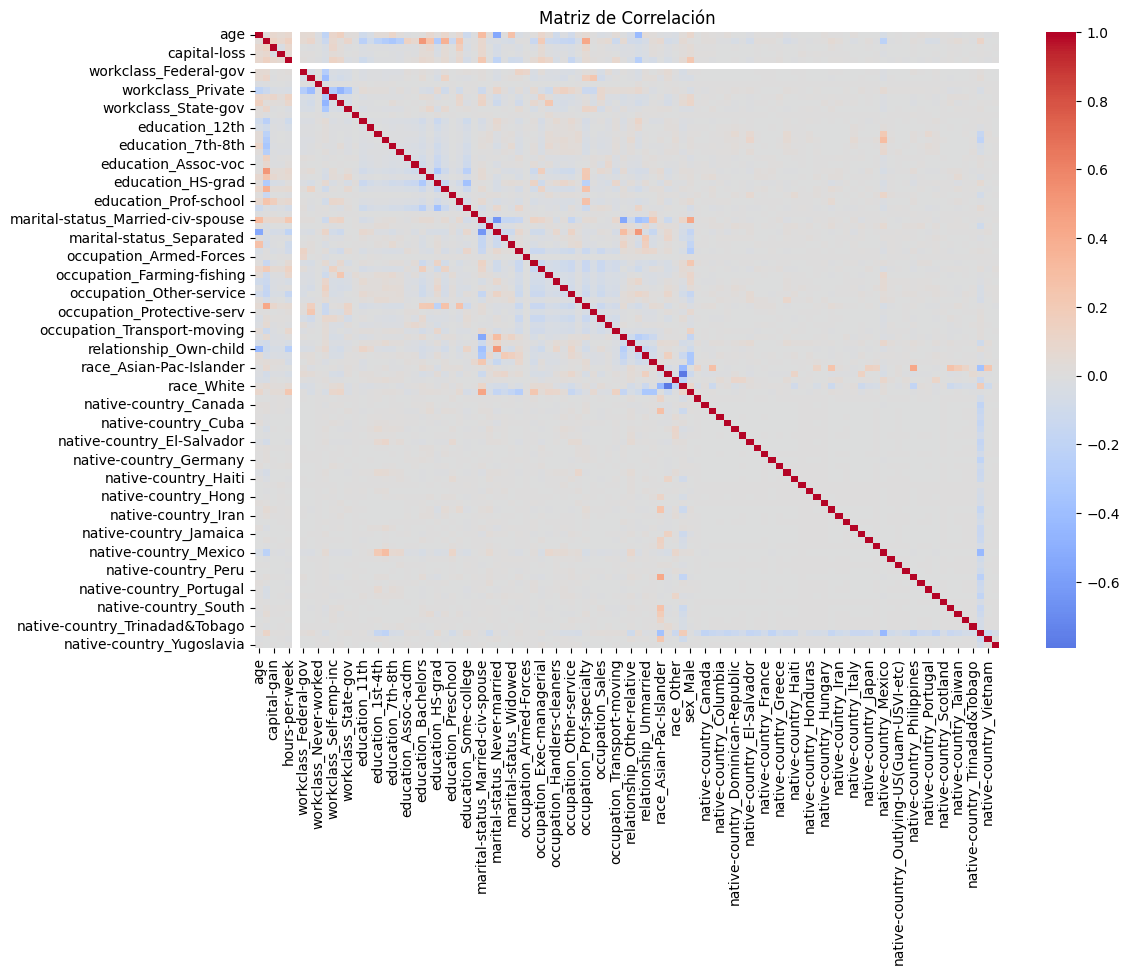

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()


## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

In [ ]:
#Intalación
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 16.1 MB/s eta 0:00:00


In [ ]:
#Importando las bibliotecas
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [ ]:
dfnuevo = df.dropna()

X = dfnuevo.drop("income", axis=1)
y = dfnuevo["income"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)